<a href="https://colab.research.google.com/github/MariamSayari/doc/blob/main/Resample%2BMFCC%2BDTW_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydub

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Remove silence

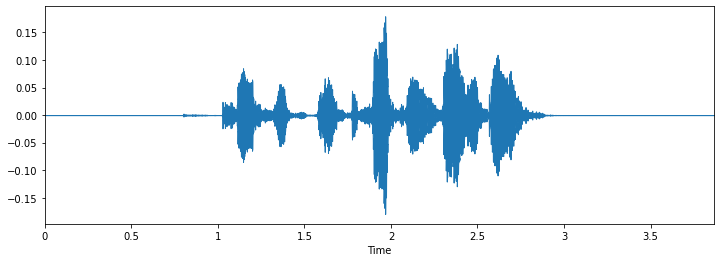

In [52]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-01.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

exporting Anger0.wav


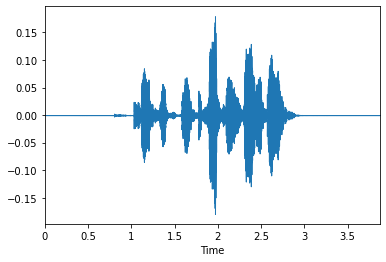

In [53]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
sound_file = AudioSegment.from_wav("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-01.wav")
audio_chunks = split_on_silence(sound_file, min_silence_len=500, silence_thresh=-50)

librosa.display.waveplot(data,sampling_rate)
for i, chunk in enumerate(audio_chunks):
   out_file = "Anger{0}.wav".format(i)
   print("exporting", out_file)
   chunk.export(out_file, format="wav")

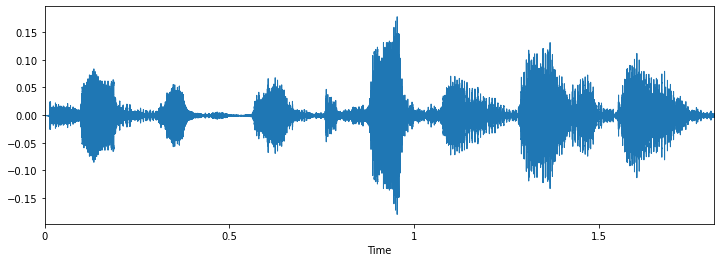

In [54]:
data_sns_sl, sampling_rate = librosa.load("Anger0.wav")
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data_sns_sl,sampling_rate)

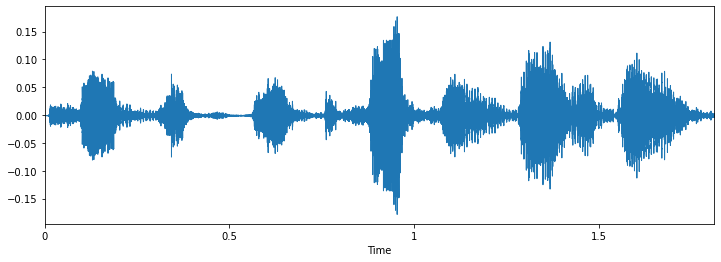

In [98]:
data_1, sampling_rate = librosa.load("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-02.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

In [99]:
sound_file = AudioSegment.from_wav("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-02.wav")
audio_chunks = split_on_silence(sound_file, min_silence_len=500, silence_thresh=-50)
 
for i, chunk in enumerate(audio_chunks):
   out_file = "Anger1.wav".format(i)
   print("exporting", out_file)
   chunk.export(out_file, format="wav")

exporting Anger1.wav


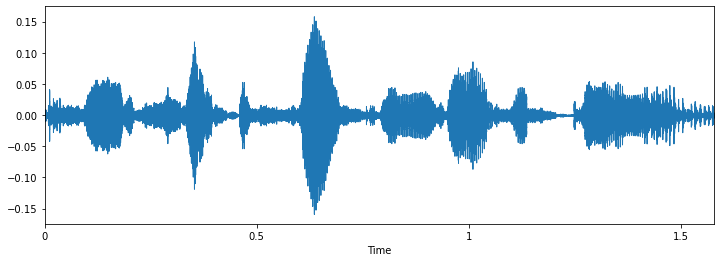

In [100]:
data, sampling_rate = librosa.load("Anger1.wav")
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

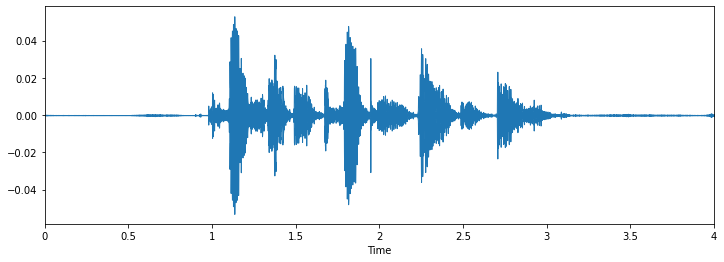

In [103]:
data, sampling_rate = librosa.load("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-03.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

In [104]:
sound_file = AudioSegment.from_wav("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-03.wav")
audio_chunks = split_on_silence(sound_file, min_silence_len=500, silence_thresh=-65)
 
for i, chunk in enumerate(audio_chunks):
   out_file = "Anger2.wav".format(i)
   print("exporting", out_file)
   chunk.export(out_file, format="wav")

exporting Anger2.wav


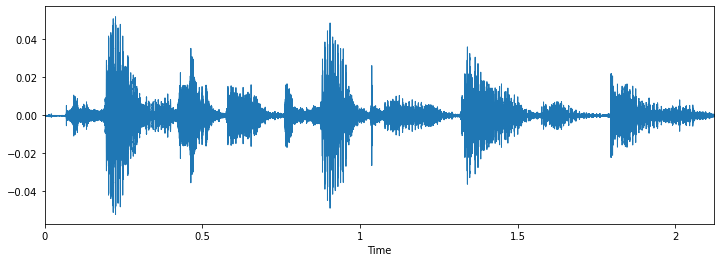

In [32]:
data, sampling_rate = librosa.load("Anger2.wav")
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

# Resample data

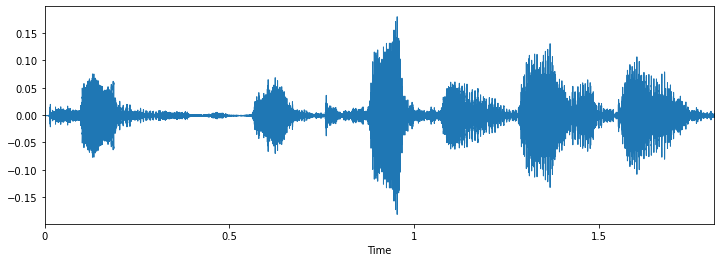

In [105]:
data_resampled, sampling_rate = librosa.load("Anger0.wav",sr=8000)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data_resampled,sampling_rate)

In [108]:
import IPython.display
IPython.display.Audio(data=data_resampled, rate=sampling_rate)

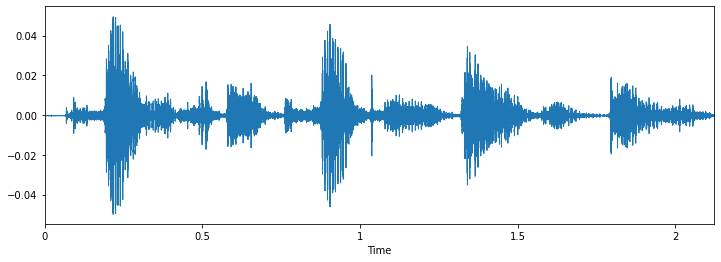

In [111]:
data_resampled_2, sampling_rate = librosa.load("Anger2.wav",sr=8000)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data_resampled_2,sampling_rate)

In [114]:
IPython.display.Audio(data=data_resampled_2, rate=sampling_rate)

# MFCC — Mel-Frequency Cepstral Coefficients

In [140]:
mfccs = librosa.feature.mfcc(data_resampled,sr=sampling_rate, n_mfcc=12, n_fft=256, hop_length=256) 
print("Nb Coeff MFCC x Nb Fenetres :",mfccs.shape)

Nb Coeff MFCC x Nb Fenetres : (12, 57)


Text(0.5, 0, 'Indice de la Trame')

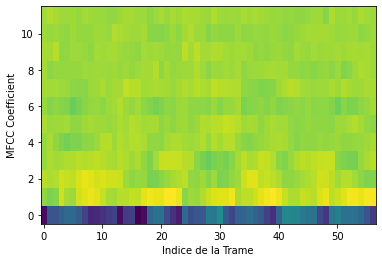

In [141]:
plt.imshow(mfccs, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient')
plt.xlabel('Indice de la Trame')

In [124]:
mfccs1 = librosa.feature.mfcc(data_resampled_2,sr=sampling_rate, n_mfcc=12, n_fft=256, hop_length=256) 
print("Nb Coeff MFCC x Nb Fenetres :",mfccs1.shape)

Nb Coeff MFCC x Nb Fenetres : (12, 67)


Text(0.5, 0, 'Indice de la Trame')

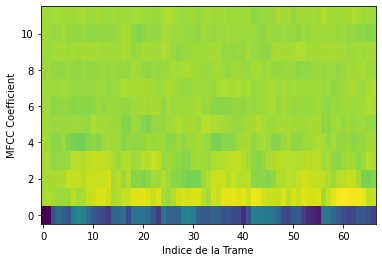

In [125]:
plt.imshow(mfccs1, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient')
plt.xlabel('Indice de la Trame')

# DTW — Dynamic Time Warping

In [126]:
!pip install dtaidistance

     |████████████████████████████████| 942kB 6.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.2.5-cp37-cp37m-linux_x86_64.whl size=1552504 sha256=766bc0810177d4968625ac0d8fd7c7ab7051810b36a8d6fb15f239f127baefdf
  Stored in directory: /root/.cache/pip/wheels/f8/37/a3/5b68a20ca502772e5affea6be75bf964ad9f481fdc54f28627
Successfully built dtaidistance


In [130]:
from dtaidistance import dtw_ndim
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f5cc0a0dfd0>])

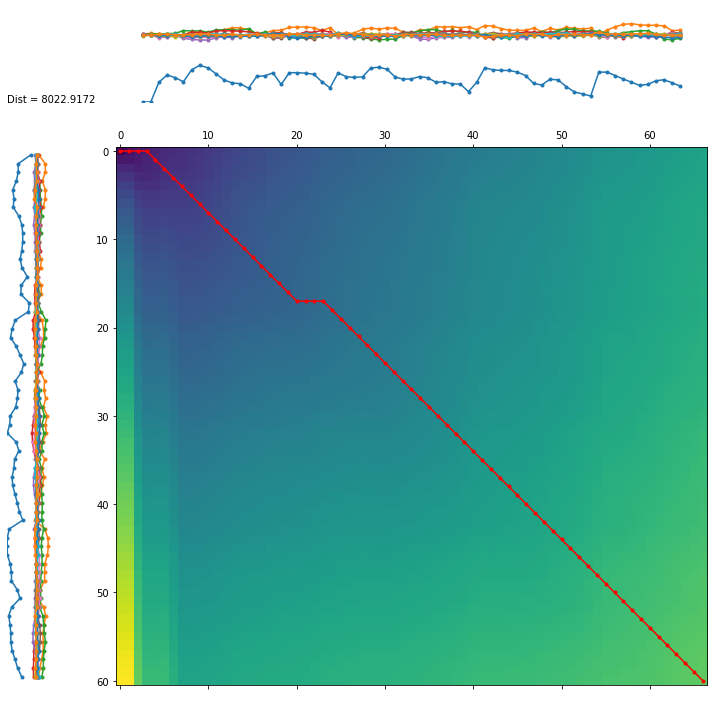

In [139]:
d, paths = dtw_ndim.warping_paths(mfccs.T, mfccs1.T)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(mfccs.T, mfccs1.T,paths, best_path)

In [135]:
len(best_path)

67